## Neural NLP models

Around 2014, the field has started to see some success in switching from linear models over sparse inputs to nonlinear complex neural network models over dense inputs. A key difference is how words are presented as relatively low-dimensional vectors that contain semantic information about the word. Two key training algorithms are **continuous-bag-of-words** and **skip-gram** -algorithms.

The CBOW model architecture tries to predict the current target word (the centre word) based on the source context words (surrounding words).

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the centre word).

![word2vec](./images/word2vec.png)

Some of the neural-network techniques are generalisations of the linear models and can be just replaced in place of the linear classifiers. Others have a totally new approach for a natural language processing task and provide new modelling opportunities. In particular, a family of approaches based on recurrent neural networks (RNNs) removes the reliance on the Markov assumption that was prevalent in sequence models, allowing to condition on arbitrarily long sequences and produce effective feature extractors. This enables the models to analyse whole sentences (and even more) instead of words, which has led to breakthroughs in language modelling, automatic machine translation, and various other applications.

Also, recent transformers-based models have achieved revolutionary results. The success of the architecture is based on a concept called attention that improves the learning by focusing on the key features and ignoring features that do not help in the task at hand. This conceptually simple innovation is largely behind the success of pre-trained models like BERT and GPT-3. The transformer is an architecture for transforming one sequence into another one with the help of two parts (Encoder and Decoder), but it differs from the previously described/existing sequence-to-sequence models because it does not imply any recurrent architectures.

(The Markov assumption means that The Markov property holds. A stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it.)


### Neural network models

Neural language models almost always use continuous representations or embeddings of words to make their predictions. These embeddings are usually implemented as layers in a neural language model. The embeddings help to alleviate the curse of dimensionality in language modelling: larger corpus --> larger vocabulary --> exponentially larger number of possible sequences of words.

Neural language models represent words in a distributed way, as a combination of weights in a neural network. Typical neural network architectures are feed-forward, recurrent, LSTM and transformers architectures.

### Pretrained language models

![elmo](./images/elmo.jpg)

#### BERT
Bidirectional Encoder Representations from Transformers (BERT) is a pre-trained NLP model developed by Google. 

The original English-language BERT model comes with two pre-trained general types: (1) the BERTBASE which uses the BooksCorpus with 800M words, and (2) the BERTLARGE that uses the English Wikipedia with 2,500M words.

At the time introduction, BERT achieved state-of-the-art in many NLP tasks, like language understanding and question answering. BERT started the revolution of modern language models.

(In the picture above is Elmo, not Bert. However, there is also a language model called Elmo:[allennlp.org](https://allennlp.org/elmo)

#### GPT-3
GPT-3 is the current state-of-the-art language model that has achieved revolutionary results. It is also the largest ML model to date, with 175 billion parameters. It was trained with data that has 499 billion tokens (words). For example, GPT-3 can create news articles that are difficult to distinguish from human-created news. It is also able to have conversations with a human. However, despite its' stellar performance in creating meaningful text, it still does not understand anything that it is saying.
Below is an example article generated by GPT-3.

![gpt3_text](./images/gpt3_desc_text.jpg)

### Sentiment Modelling

### NLP example - IMDB

In this example, we build a simple neural network model to predict the sentiment of movie reviews.

First, we load the IMDB data that is included in the **Keras** library (part of **Tensorflow**). Also, we load the **preprocessing** module.

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

This is a dataset of 25,000 movies reviews from IMDB, labelled by sentiment (positive/negative). The reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). 

Words are ranked by how often they occur (in the training set) and only the **num_words** most frequent words are kept. Any less frequent word will appear as `oov_char` value in the sequence data. If we use **num_words = None**, all words are kept.

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

The following commands pad sequences to the same length, in this case, to 20 words.

**pad_sequences()** creates a 2D Numpy array of shape (number of samples x number of words) from a list of sequences.

In [3]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=20)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=20)

In [4]:
x_train.shape

(25000, 20)

In [5]:
y_train.shape

(25000,)

### Densely connected network

We first build a traditional densely connected feed-forward-network. We also need an Embedding layer to code our words efficiently and a Flatten layer to transform our 2D-tensor to 1D-vector.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

Our embedding layer codes 10000 words to 8-element vectors. The output layer has one neuron and a sigmoid-activation function that gives a probability for positive/negative. **model.sequential()** defines the network type, and the **add()** -functions are used to add layers to the model.

In [7]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=20))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Like with the examples of the computer vision section, we can stick with the **RMSprop** gradient descent optimiser. Because we are doing positive/negative classification, binary_crossentropy is the correct loss function. We measure the model performance with prediction accuracy.

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

The model has 80161 parameters.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


The data is split into training and validation parts with 80/20% division. We go through the data ten times (**epochs=10**). The data is fed to the model in 32 unit batches and, thus, each epoch has 625 steps (32 * 625 = 20000). Our prediction accuracy with the validation data is 0.75. However, the model appears to be overfitting as the validation loss is increasing, and there is a wide gap between the training accuracy and the validation accuracy in the last epochs.

In [10]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6664 - acc: 0.6326 - val_loss: 0.6148 - val_acc: 0.7040
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5389 - acc: 0.7514 - val_loss: 0.5266 - val_acc: 0.7302
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4611 - acc: 0.7863 - val_loss: 0.5022 - val_acc: 0.7434
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4223 - acc: 0.8091 - val_loss: 0.4948 - val_acc: 0.7552
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3964 - acc: 0.8225 - val_loss: 0.4934 - val_acc: 0.7582
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3738 - acc: 0.8342 - val_loss: 0.4964 - val_acc: 0.7578
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3538 - acc: 0.8462 - val_loss: 0.5011 - val_acc: 0.7562
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

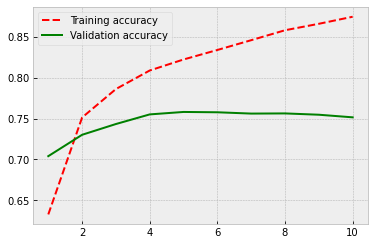

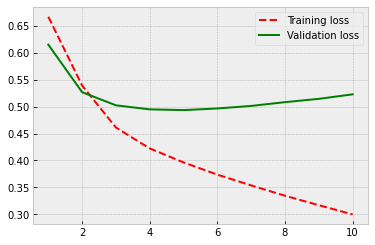

In [11]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

As our first improvement, we could try to use pre-trained embeddings in our model. Word embeddings include semantic information about our words (words appearing in similar contexts are close to each other). Pretrained embeddings are trained using vast amounts of text (billions of words). One could assume that the semantic information in these pre-trained embeddings is of higher quality and should improve our predictions. Let's see...

To be able to use this approach, we need the original IMBD data. Search for aclimdb.zip from the internet.

In [70]:
import os

My raw data is in the *aclImdb* -folder under the work folder

In [71]:
imdb_raw = './aclImdb/'

First, we define empty lists for the reviews and their sentiment labels. Then we collect the negative reviews from *./aclImdb/train/neg* -folder. We also add to the labels-list zero for these cases. A similar approach is repeated for the positive reviews. Thus, in our lists, we have first the negative reviews and the positive reviews.

In [72]:
labels = []
texts = []

In [73]:
# Collect negative reviews
train_neg_dir = os.path.join(imdb_raw,'train','neg')
for file in os.listdir(train_neg_dir):
    f = open(os.path.join(train_neg_dir, file))
    texts.append(f.read())
    f.close()
    labels.append(0)

In [74]:
# Collect positive reviews
train_neg_dir = os.path.join(imdb_raw,'train','pos')
for file in os.listdir(train_neg_dir):
    f = open(os.path.join(train_neg_dir, file))
    texts.append(f.read())
    f.close()
    labels.append(1)

Below is an example text and its' sentiment (0=negative).

In [75]:
texts[0]

'There are some bad movies out there. Most of them are rather fun. "Criminally Insane 1" was one of those flicks. So bad that it was enjoyable and had re-watch value to it. "Criminally Insane 2" has to be one of the worst movies ever made and coming from me, that\'s saying a lot because I am not the type of person to say anything is the worst. But trust me, this was just completely awful and running just 1 hour is 1 hour too long.<br /><br />The movie has a rather incoherent storyline, but who cares about story when all you want to see is a big fat woman running around killing people because she isn\'t being fed. Well, you don\'t see that in this movie, except for all of the flashback sequences that are from the first one. The new storyline could have been really funny with Ethel being sent to a halfway house and murdering everyone in there, but nothing happens until the last 20 minutes of the movie and at that point you are already falling asleep.<br /><br />The camera work in this mo

In [76]:
labels[0]

0

We need Numpy and text-processing tools from the Keras libary.

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

The following commands tokenise words into vectors.

In [78]:
tokenizer = Tokenizer(num_words = 10000)

In [79]:
tokenizer.fit_on_texts(texts)

The following commands transform each text in texts to a sequence of integers.

Only words known by the tokenizer will be taken into account. It will take into account only the 10000 most frequent words.

In [80]:
sequences = tokenizer.texts_to_sequences(texts)

Now, we use longer texts. We keep the 200 first words from each review.

In [81]:
data = pad_sequences(sequences, maxlen=200)

The following command transforms the labels list to a numpy array.

In [82]:
labels = np.asarray(labels)

In [83]:
data.shape

(25000, 200)

In [84]:
labels.shape

(25000,)

Because the reviews are in order (all the negative reviews first and then the positive reviews), we have to shuffle the data before feeding it to the model.

In [85]:
indices = np.arange(25000)

np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

80 / 20 % separation of the data to training and validation parts.

In [86]:
x_train = data[:20000]
y_train = labels[:20000]
x_val = data[20000: 25000]
y_val = labels[20000: 25000]

The Stanford NLP group offers GLOVE pre-trained embeddings. You can download them from [nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/). We use the glove6B.zip that is trained using 6 billion tokens. Each word is represented as a 100-dimensional vector.

In [87]:
# we use 100-dimensional vectors
embeddings_index = {}
f = open(os.path.join('./glove.6B/', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

GLOVE has 400k tokens.

In [91]:
len(embeddings_index)

400000

We build the embedding matrix by going through our word index and adding its' embeddings from the Glove model (if it is found).

In [92]:
embedding_matrix = np.zeros((10000, 100))
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Because our model uses now 100-dimensional word vectors, the network also has a lot of more parameters. Our network also has a new 32-neuron dense layer after the Flatten-layer.

In [93]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


We set the weights of the embedding layer using the Glove weights in the embedding matrix. The weights need to be locked so that we are not retraining them with our small dataset.

In [94]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Again, we use the RMSprop optimiser, the binary_crossentropy loss function and accuracy as our performance metric.

In [95]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [96]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6591 - acc: 0.6439 - val_loss: 0.5575 - val_acc: 0.7138
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5045 - acc: 0.7554 - val_loss: 0.5326 - val_acc: 0.7366
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4155 - acc: 0.8091 - val_loss: 0.5454 - val_acc: 0.7398
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3605 - acc: 0.8390 - val_loss: 0.7307 - val_acc: 0.6964
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3113 - acc: 0.8618 - val_loss: 0.6184 - val_acc: 0.7422
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2661 - acc: 0.8821 - val_loss: 0.6603 - val_acc: 0.7364
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2195 - acc: 0.9068 - val_loss: 0.8240 - val_acc: 0.7044
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

Not a good performance. Heavy overfitting and worse accuracy. Let's try something else.

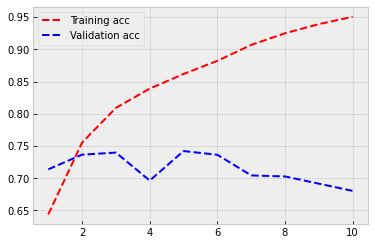

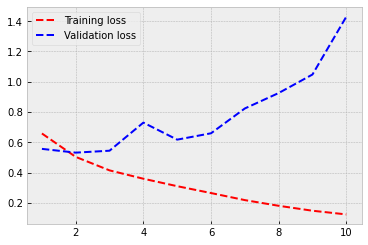

In [97]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

### Recurrent neural networks

Next thing that we can try is to use Recurrent neural networks. They are especially efficient for sequences like texts.

![RNN](./images/rnn.svg)

In [98]:
from tensorflow.keras.layers import SimpleRNN

Now, instead of a Flatten() layer, we have a SimpleRNN() layer.

In [99]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,020,201
Trainable params: 1,020,201
Non-trainable params: 0
_________________________________________________________________


Again, we use the GLOVE weights.

In [100]:
# Load GLove wieghts
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,020,201
Trainable params: 20,201
Non-trainable params: 1,000,000
_________________________________________________________________


Nothing has changed in the compile() and fit() -steps.

In [102]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [103]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 24s 38ms/step - loss: 0.6528 - acc: 0.6186 - val_loss: 0.6096 - val_acc: 0.6786
Epoch 2/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5957 - acc: 0.6887 - val_loss: 0.5760 - val_acc: 0.7066
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.5761 - acc: 0.7047 - val_loss: 0.5618 - val_acc: 0.7272
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 0.5618 - acc: 0.7147 - val_loss: 0.5384 - val_acc: 0.7428
Epoch 5/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5534 - acc: 0.7227 - val_loss: 0.5499 - val_acc: 0.7248
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5553 - acc: 0.7169 - val_loss: 0.5894 - val_acc: 0.6918
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5374 - acc: 0.7325 - val_loss: 0.5234 - val_acc: 0.7494
Epoch 8/10
625/625 [==============================] - 28s 45ms

Well, overfitting is not such a serious problem any more, but the performance is not improving still.

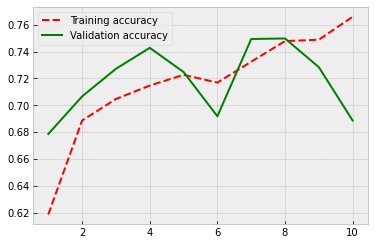

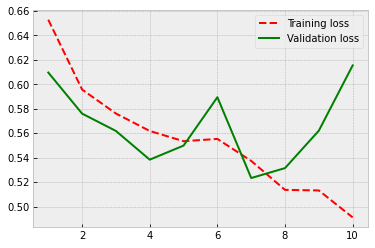

In [104]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

### Long short-term memory

As our last idea, we try the LSTM-version of RNN. It has achieved very good performance in practice, so, let's hope for the best.
![lstm](./images/lstm.svg)

In [105]:
from tensorflow.keras.layers import LSTM

In [106]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Load GLove wieghts
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 80,501
Non-trainable params: 1,000,000
_________________________________________________________________


In [109]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [110]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.5607 - acc: 0.7138 - val_loss: 0.4525 - val_acc: 0.7844
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 0.4275 - acc: 0.8061 - val_loss: 0.6175 - val_acc: 0.7750
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3619 - acc: 0.8458 - val_loss: 0.3399 - val_acc: 0.8524
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.3254 - acc: 0.8616 - val_loss: 0.3284 - val_acc: 0.8594
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2937 - acc: 0.8752 - val_loss: 0.3091 - val_acc: 0.8728
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2712 - acc: 0.8884 - val_loss: 0.2998 - val_acc: 0.8716
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2455 - acc: 0.9002 - val_loss: 0.3528 - val_acc: 0.8560
Epoch 8/10
625/625 [==============================] - 7s 11ms/step - 

Finally, we see some progress! Now the accuracy is around 87 %. So, a very significant improvement in performance. For the exact evaluation of performance, we should use a separate test set. However, the validation dataset accuracy gives a good indication of the performance of our model.

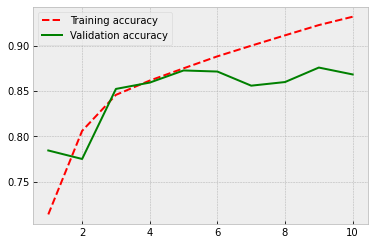

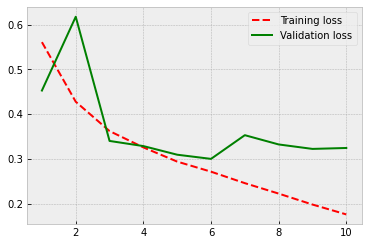

In [112]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

As our final model, let's test what kind of effect the predetermined weights have for the performance and train an LSTM model from scratch.

In [113]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=200))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [115]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4124 - acc: 0.8138 - val_loss: 0.3248 - val_acc: 0.8686
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2546 - acc: 0.9002 - val_loss: 0.3000 - val_acc: 0.8792
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2125 - acc: 0.9188 - val_loss: 0.3030 - val_acc: 0.8734
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1897 - acc: 0.9281 - val_loss: 0.3205 - val_acc: 0.8782
Epoch 5/10
625/625 [==============================] - 8s 14ms/step - loss: 0.1685 - acc: 0.9387 - val_loss: 0.3162 - val_acc: 0.8716
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1592 - acc: 0.9424 - val_loss: 0.3449 - val_acc: 0.8752
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1416 - acc: 0.9490 - val_loss: 0.3605 - val_acc: 0.8742
Epoch 8/10
625/625 [==============================] - 7s 11ms/step - 

Because there are no locked parameters, the number of trainable parameters increases, and this causes some overfitting. However, the performance is at the same level as in the previous model. So, the predetermined weights do not appear to improve the accuracy, but they help at fighting overfitting.

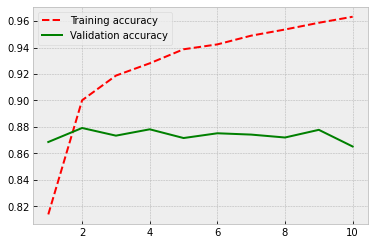

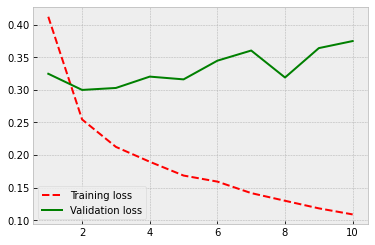

In [116]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

### Neural topic analysis

ERTopic is a topic modeling technique that leverages 🤗 transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. It even supports visualizations similar to LDAvis!

### Named entity recognition

### Advanced summarisation